# Implementation: parallel tempering

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [22]:
# set parameters for target/proposal distribution
mu0 = 100
mu1 = 1

target_sigma0 = 1
target_sigma1 = 2

proposal_sigma = 1

# target distribution: normal case
f = lambda x: norm(mu0, target_sigma0).pdf(x)
energy = lambda x: -np.log(f(x))

# target distribution: binormal case
# f = lambda x: norm(mu0, target_sigma0).pdf(x) + norm(mu1, target_sigma1).pdf(x)
energy = lambda x: -np.log(f(x))

# def energy(x):
#     if f(x) < 1e-20:
#         return -1e10
#     else:
#         return -np.log(f(x))

#Proposal distribution: bivariate normal distribution
proposal = lambda x: np.random.normal(x, proposal_sigma)

In [27]:
## simulated annealing 
# codes adapted from AM207 Lecture 11 slides

#initialization for simulated annealing
init_params = {'solution':10, 'min_length':1000, 'max_temp':30}
num_epochs=50000
temp=10


#Simulated Annealing
def simulated_annealing(energy, proposal, init_params, epochs, temp):
    accumulator = []
    
    old_solution = init_params['solution']
    old_energy = energy(old_solution)
  
    accepted=0
    total=0

    
    for epoch in range(epochs):
        
        total += 1

        #propose new solution based on current solution
        new_solution = proposal(old_solution)
        
        #compute energy of new solution
        new_energy = energy(new_solution)

        #compute a probability for accpeting new solution
        alpha = min(1, np.exp((old_energy - new_energy) / temp))

        #MH sampling
        if np.random.uniform() < alpha: 
            #update everything if new solution accepted
            accepted += 1
            accumulator.append([new_solution, new_energy])

            old_energy = new_energy
            old_solution = new_solution

        else:
            # Keep the old stuff if new solution not accepted
            accumulator.append([old_solution, old_energy])

    return np.array(accumulator), accepted * 1. / total

In [28]:
accumulator, ratio = simulated_annealing(energy, proposal, init_params, epochs=num_epochs, temp=temp)
print(f"acceptance: {ratio*100:.2f}%")

/Users/rachelmoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/rachelmoon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


acceptance: 98.29%


In [29]:
# first col: sample
# second col: energy function value
accumulator

array([[ 11.93675705,          inf],
       [ 12.85227742,          inf],
       [ 13.99296815,          inf],
       ...,
       [103.18388655,   5.98750533],
       [102.82402282,   4.90649097],
       [100.67988559,   1.15006074]])

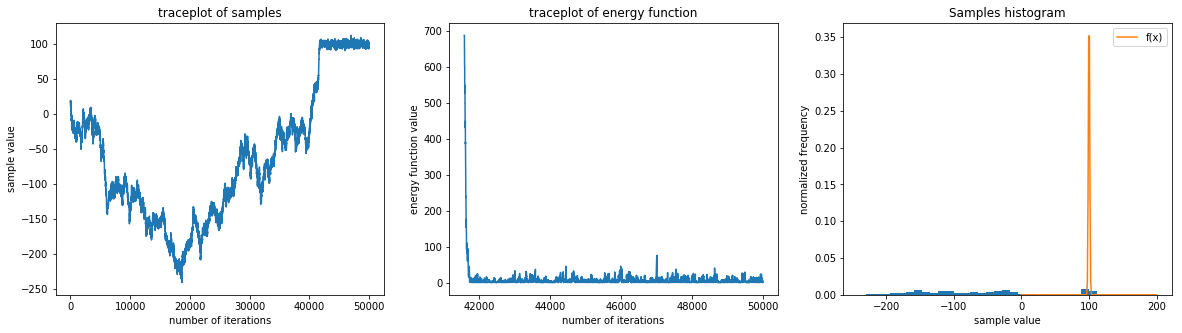

In [30]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(range(num_epochs), accumulator[:,0])
ax[0].set_title("traceplot of samples")
ax[0].set_ylabel("sample value")
ax[0].set_xlabel("number of iterations")

ax[1].plot(range(num_epochs), accumulator[:,1])
ax[1].set_title("traceplot of energy function")
ax[1].set_ylabel("energy function value")
ax[1].set_xlabel("number of iterations")

ax[2].hist(accumulator[:,0], bins=30,density=True)
#xgrid = np.linspace(np.min(accumulator[:,0]),np.max(accumulator[:,0]),200)

xgrid = np.linspace(0,200,200)
ax[2].plot(xgrid, f(xgrid), label="f(x)")
ax[2].set_title("Samples histogram")
ax[2].set_ylabel("normalized frequency")
ax[2].set_xlabel("sample value")

ax[2].legend()
plt.show()